In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
# Extract the ZIP file
zip_path = '/content/archive.zip'  # Path to the zip file
extract_path = '/content/datast'  # Path to extract the dataset

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
print(f"Dataset extracted to {extract_path}")

Dataset extracted to /content/datast


In [ ]:
#  Verify dataset structure
# Assume the dataset contains 'train' and 'test' directories
train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')

In [ ]:
# Load images using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=64
)

Found 28709 files belonging to 7 classes.


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=64
)

Found 7178 files belonging to 7 classes.


In [ ]:
# Normalize pixel values
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, tf.one_hot(label, depth=7)

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_dataset,
                    validation_data=test_dataset,
                    epochs=40,
                    verbose=1)

Epoch 1/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.2414 - loss: 2.0357 - val_accuracy: 0.3064 - val_loss: 2.3847
Epoch 2/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3302 - loss: 1.6620 - val_accuracy: 0.3597 - val_loss: 1.5837
Epoch 3/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3788 - loss: 1.5760 - val_accuracy: 0.4402 - val_loss: 1.4613
Epoch 4/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4090 - loss: 1.5039 - val_accuracy: 0.4490 - val_loss: 1.4225
Epoch 5/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4345 - loss: 1.4553 - val_accuracy: 0.4663 - val_loss: 1.3972
Epoch 6/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.4469 - loss: 1.4199 - val_accuracy: 0.4857 - val_loss: 1.3327
Epoch 7/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4658 - loss: 1.3835 - val_accuracy: 0.5149 - val_loss: 1.2663
Epoch 8/40
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4701 - loss: 1.3614 - val_accura

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.59


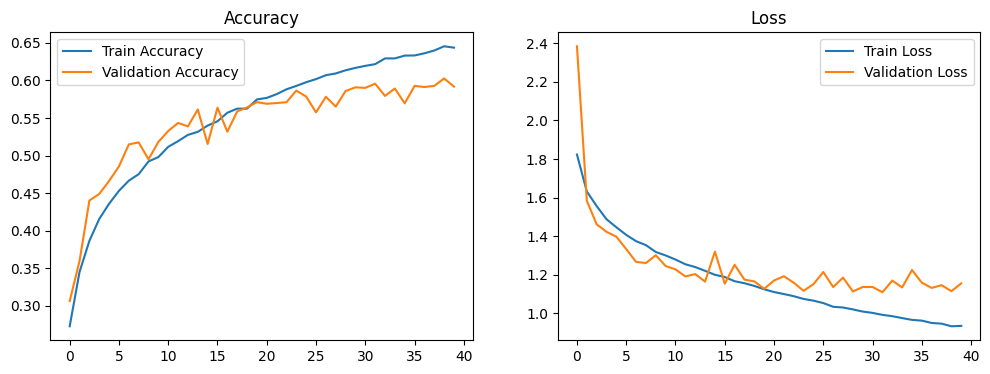

In [ ]:
# Visualize Training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [ ]:
# Visualize Predictions
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'] # Add the missing class names

def plot_sample(image, true_label, predicted_label):
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


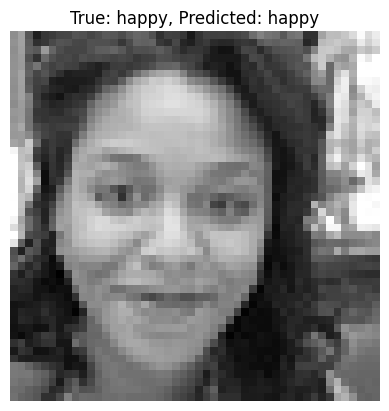

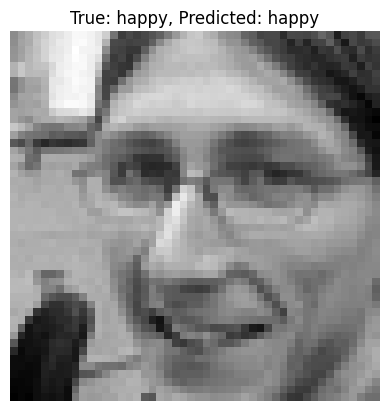

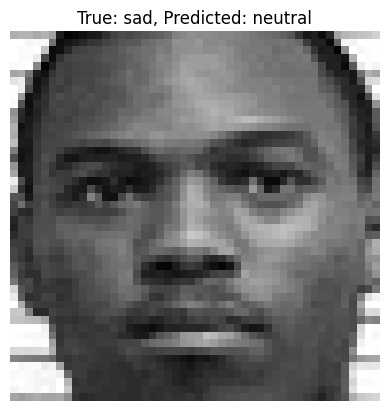

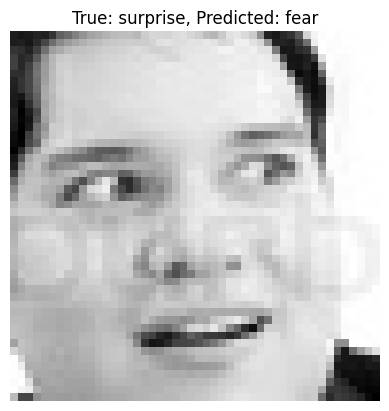

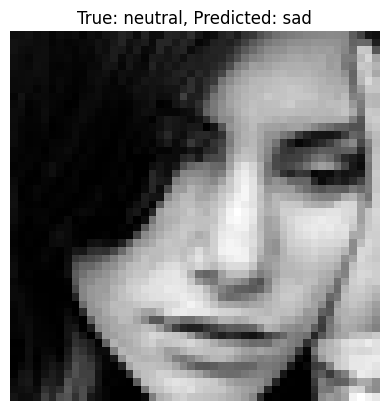

In [ ]:
# Make predictions on a few test images
for image_batch, label_batch in test_dataset.take(1):  # Take one batch from the test dataset
    predictions = model.predict(image_batch)
    for i in range(5):
        plot_sample(image_batch[i], tf.argmax(label_batch[i]).numpy(), tf.argmax(predictions[i]).numpy())